# **Group 18: Pittsburgh's Best Neighborhood**
Our group decided to rank the neighborhoods of Pittsburgh based on their child friendliness.

In [2]:
import ssl
import pandas as pd
import numpy as np

ssl._create_default_https_context = ssl._create_unverified_context

pd.set_option('display.max_columns', None)

census = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/8ac5c768-09ba-43a8-829f-ce4a417d20fb/download/population-density.csv",
                            index_col="Neighborhood", 
                            parse_dates=True)

playground = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b",
                            index_col="neighborhood", 
                            parse_dates=True)

pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a",
                            index_col="neighborhood", 
                            parse_dates=True)
rinks = pd.read_csv("https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227", 
                            index_col="id", usecols=["id", "name", "neighborhood"], header=0)

## **Metric**
Our metric is designed for families growing children. We will show attractions per child so families can measure child friendliness. We’ll use the formula that follows for an objective score: **S = (number of children) / ((number of playgrounds)+(number of courts and rinks)+(number of pools))** to find how many children there are for each attraction. The neighborhoods with lower scores are ranked better than neighborhoods with higher scores. 

### **Number Of Children**

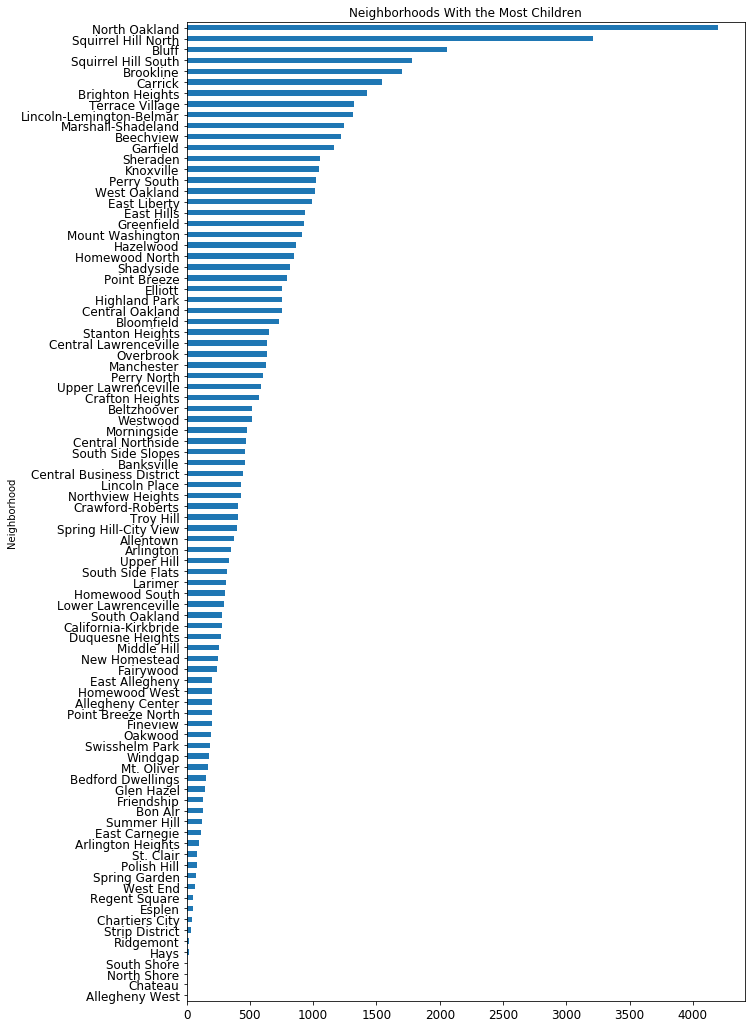

In [3]:
census = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/8ac5c768-09ba-43a8-829f-ce4a417d20fb/download/population-density.csv",
                           index_col="Neighborhood", 
                           parse_dates=True)

#refining columns for math operations
census["Pop. 2010"] = census["Pop. 2010"].str.replace(",", "")
census["Pop. 2010"] = census["Pop. 2010"].astype(int)

#calculating number of children per neighborhood
census["Children Age 5-19"] = (census["Pop. 2010"] * census["% Pop. Age 5-19 (2010)"]).astype(int)

#transfer census data to children for convenience
children = census.loc[:, ["Children Age 5-19"]]
children = children["Children Age 5-19"].sort_values(ascending=False)

childrenGraph = children.plot.barh(title="Neighborhoods With the Most Children", figsize=(10,18), fontsize=12, rot=0).invert_yaxis()

### **Number of Playgrounds**

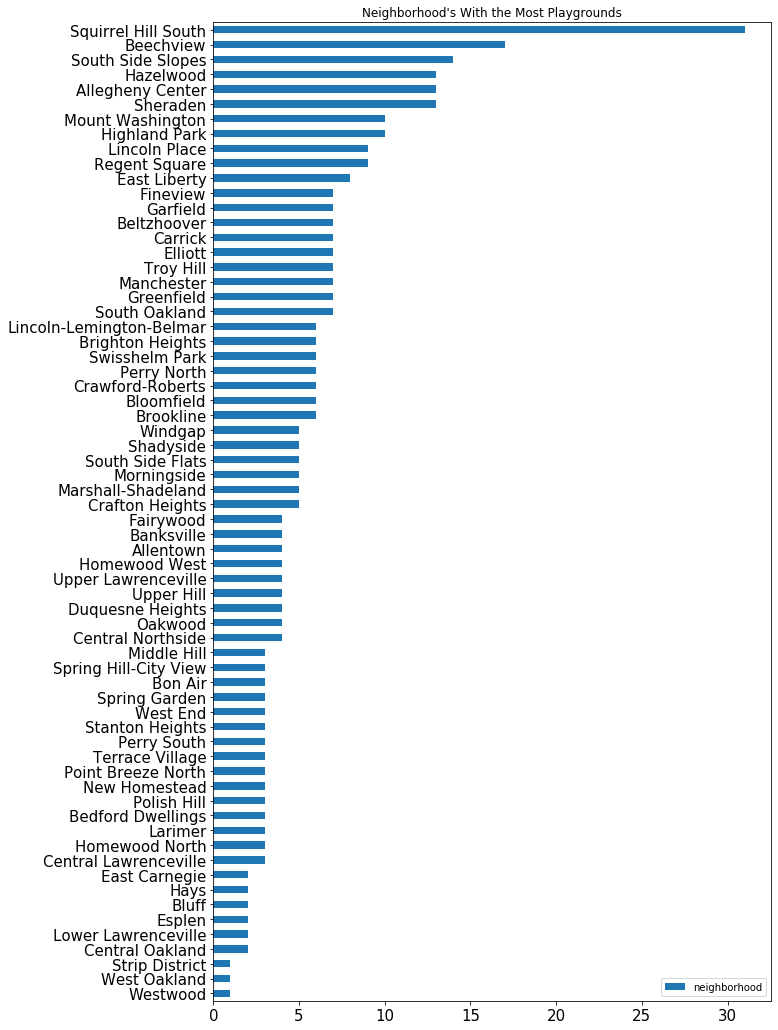

In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)

playground = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b",
                            index_col="neighborhood", 
                            parse_dates=True)

playground = playground.sort_index(ascending=True)

playground = playground[playground['equipment_type'].str.find("Spring Toy")<0]

#removed Spring Toys from the list so only large playground structures are counted

totals = playground.index.value_counts().sort_values(ascending = False)

totals_df = pd.DataFrame(totals)
# totals_df is the final dataframe with all totals listed next to the neighborhoods in descending order
# Squirrel Hill South has the most structures by far with 31--Beechview is in second with 17 structures

totals_df.plot.barh(title="Neighborhood's With the Most Playgrounds", figsize=(10,18), fontsize=15, rot=0).invert_yaxis()


### **Number of Courts and Rinks**

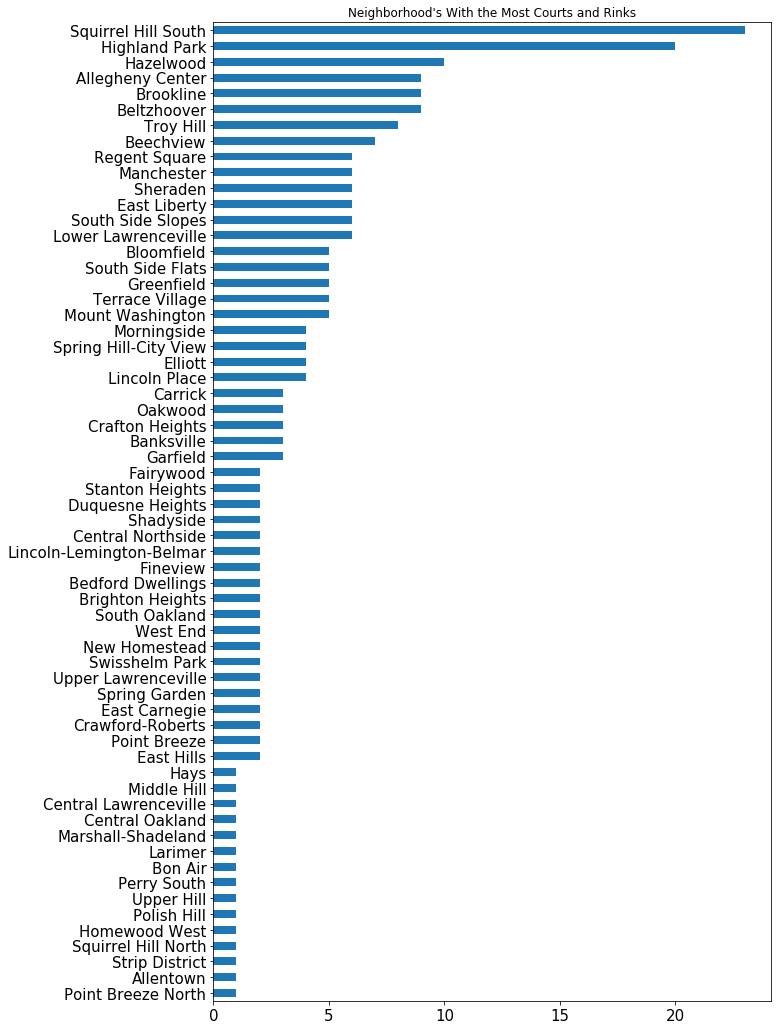

In [10]:
# Organizing the neighborhoods into alphabetical order and counting how many occurences there are for each neighborhood in the dataset
nbhCounts = rinks['neighborhood'].value_counts(normalize=False, sort=True).sort_index(ascending=True)

#Creating a horizontal bar chart to visualize the neighborhood "Courts and Rinks" metric
nbhCountsInOrder = rinks['neighborhood'].value_counts(normalize=False, sort=True)
nbhCountsInOrder.plot.barh(title="Neighborhoods With the Most Courts and Rinks", figsize=(10,18), fontsize=15, rot=0).invert_yaxis()

Here we see that Squirrel Hill South has the highest number of courts and rinks at 23, followed by Highland Park at 20, and Hazelwood at 10.

In [8]:
# Initializing an array for the number of occurences per neighborhood, in alphabetical order.
nbhValues = []
for word in nbhCounts:
    words = word
    nbhValues.append(words)
print(nbhValues)

[9, 1, 3, 2, 7, 9, 5, 1, 2, 9, 3, 1, 2, 1, 3, 2, 2, 2, 2, 6, 4, 2, 2, 3, 5, 1, 10, 20, 1, 1, 4, 2, 6, 6, 1, 1, 4, 5, 2, 3, 1, 2, 1, 1, 6, 2, 6, 2, 5, 6, 2, 4, 1, 23, 2, 1, 2, 5, 8, 1, 2, 2]


### **Number of Pools**

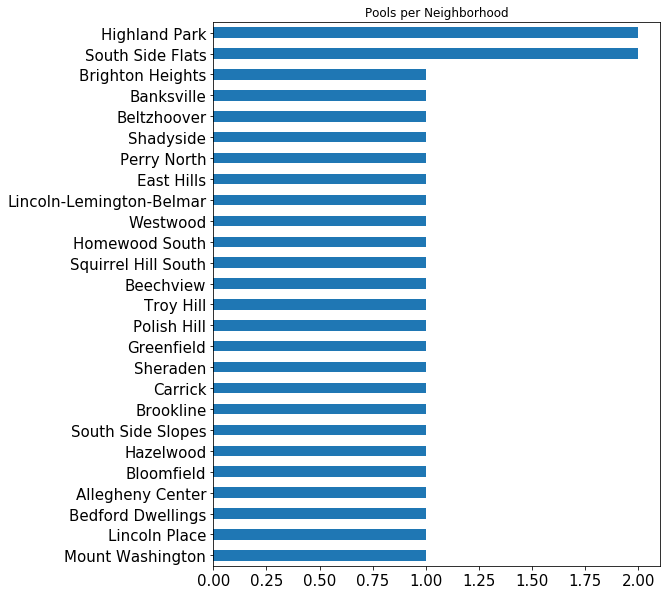

In [13]:
import pandas as pd

pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a", 
                        parse_dates=True)

poolCount = pools['neighborhood'].value_counts(normalize=False, sort=True).sort_index(ascending=True) #counts num of pools

poolGraph = pools['neighborhood'].value_counts(normalize=False, sort=True) #graphs it out
poolGraph.plot.barh(title="Pools per Neighborhood", figsize=(8,10), fontsize=15, rot=0).invert_yaxis()

# **Final Metric**

Again the final metric is calculated with the equation:

**S = (Number of Children) / ((Number of Playgrounds) + (Number of Courts and Rinks) + (Number of Pools))**

and the neighborhood with the lowest s-value is crowned as the best neighborhood.

#### **Conclusions**

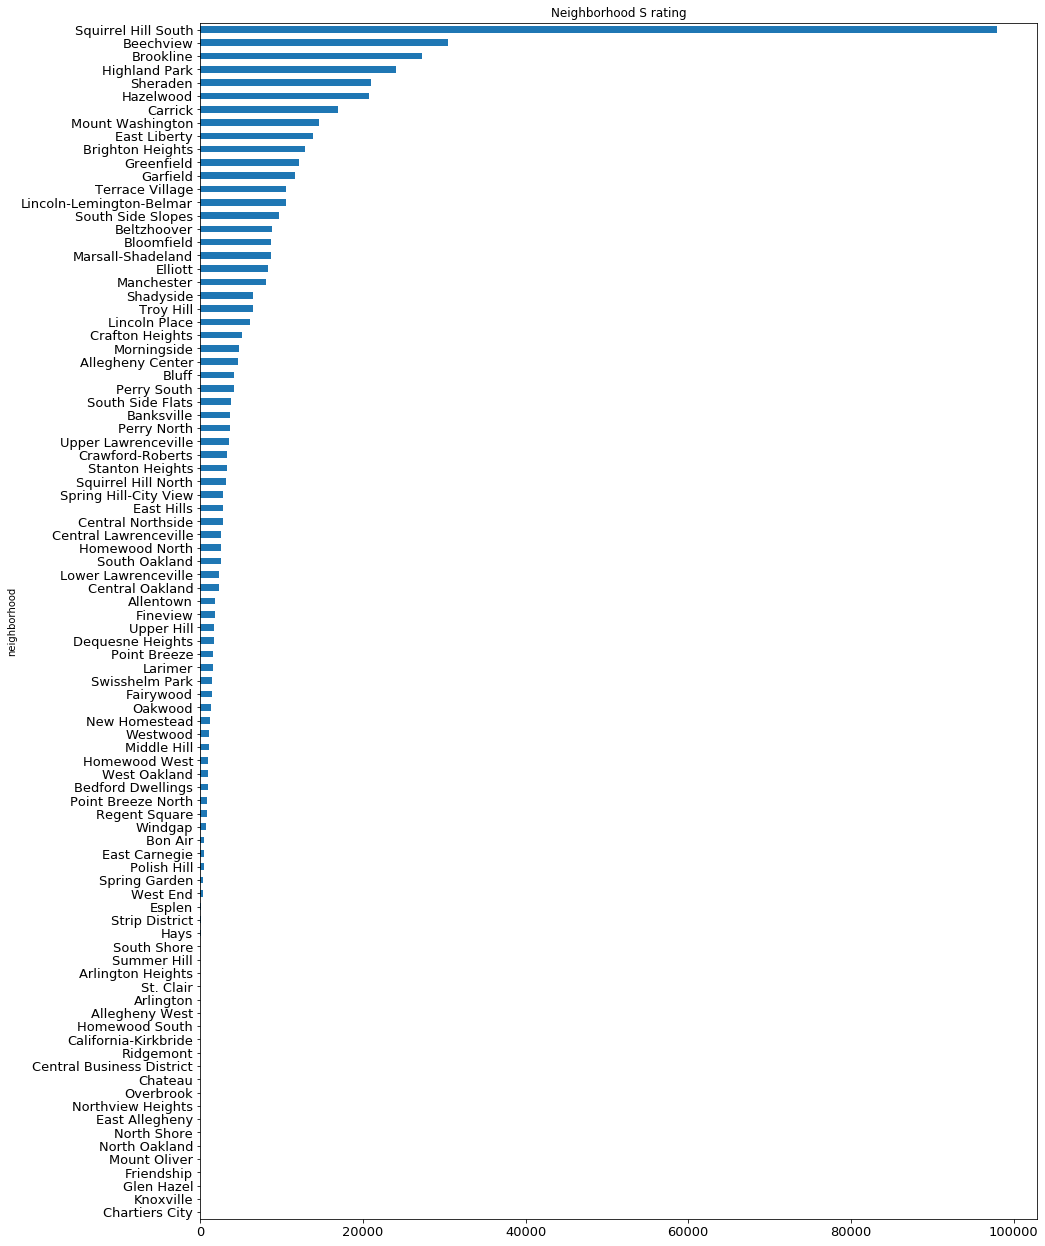

In [10]:
import numpy as np

data = pd.read_csv("BigIdeasFinalData.csv", 
                  index_col="neighborhood", 
                    header=0,
                        parse_dates=True)

data['rating'] = (data['children'] * (data['playgrounds'] + data['rinks'] + data['pools'])).replace(np.inf, 0).replace(np.NaN, 0)

dataRatings = data['rating'].sort_values(ascending=False)
dataRatings.plot.barh(title="Neighborhood S rating", figsize=(15,22), fontsize=13, rot=0).invert_yaxis()


## Conclusion

After combining our datasets and applying the formula, we see that Ridgemont is surprisingly the leader by children per attraction. However, Ridgemont isn't the place I'd imagine a child to call home. Looking back at the Number of Children chart, we see that Ridgemont